# Example Data Notebook for TAQ Database


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
import configobj


from scripts.query_helpers import client_connection
from scripts.preprocess import clean_trades,clean_quotes,chunk_clean


### Personal Details

Access information will be stored within an env file

In [2]:
config = configobj.ConfigObj(".env")
host = config["host"]
server_user = config["server_user"]
server_password = config["server_password"]
db_user = config["db_user"]
db_pass = config["db_pass"]


### Setup the client connection to the DB

In [3]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

Includes support for multiple exchanges  (Required by the Order Protection Rule)

In [4]:
exchange="'N'"
symbol='AAPL'
start= "2020-01-01"
end="2020-01-10"


In [5]:
result,path=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!


Trade Query for 'N' AAPL 2020-01-01 2020-01-10


/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/clickhouse_sqlalchemy/drivers/base.py:268: SAWarning: Did not recognize type 'DateTime64(9, 'America/New_York')' of column 'Time'
  warn("Did not recognize type '%s' of column '%s'" %


In [ ]:
trades=pd.read_csv(path)
trades=clean_trades(trades)
trades

,SIP_Timestamp,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Trade_Through_Exempt_Indicator,date
2020-01-02 09:30:00.134336,2020-01-02 09:30:00.134553,K,AAPL,250,296.24,@,N,0,19803,1100,,0,2020-01-02
2020-01-02 09:30:00.134371,2020-01-02 09:30:00.134577,K,AAPL,50,296.24,@ I,N,0,19804,1101,,0,2020-01-02
2020-01-02 09:30:00.134532,2020-01-02 09:30:00.134742,K,AAPL,108,296.21,@,N,0,19805,1102,,0,2020-01-02
2020-01-02 09:30:00.157191,2020-01-02 09:30:00.157563,P,AAPL,1,296.28,@F I,N,0,19878,1763,,1,2020-01-02
2020-01-02 09:30:00.157191,2020-01-02 09:30:00.157564,P,AAPL,1,296.28,@ Q,N,0,19879,1764,,0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-09 19:59:55.811102,2020-01-09 19:59:55.811487,P,AAPL,10,310.40,@ TI,N,0,3630464,33011,,0,2020-01-09
2020-01-09 19:59:55.811102,2020-01-09 19:59:55.811487,P,AAPL,99,310.40,@ TI,N,0,3630463,33010,,0,2020-01-09
2020-01-09 19:59:55.811102,2020-01-09 19:59:55.811488,P,AAPL,591,310.40,@ T,N,0,3630465,33012,,0,2020-01-09
2020-01-09 19:59:59.703619,2020-01-09 19:59:59.703863,K,AAPL,5,310.40,@ TI,N,0,3630468,23417,,1,2020-01-09


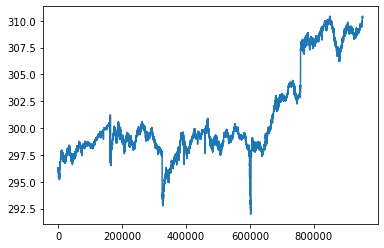

In [ ]:
plt.plot(trades['Trade_Price'].values)

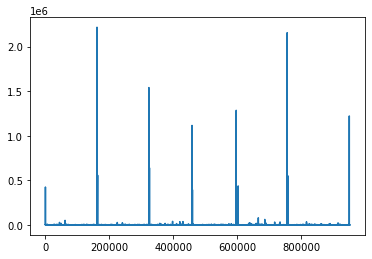

In [ ]:
plt.plot(trades['Trade_Volume'].values)

### Example Quote Query

Includes support for multiple exchanges (Required by the Order Protection Rule)

In [ ]:
exchange="'N'"
symbol='AAPL'
start= "2020-01-01"
end="2020-01-03"

In [ ]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Loop through multiple days without server timeout

In [ ]:
result,path= conn.get_quotes_range(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)


Quote Query for 'N' AAPL 2020-01-01 2020-01-02


INFO:paramiko.transport:Authentication (password) successful!
/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/pandas/core/arrays/datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(


['N']


INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


Saved Quotes for AAPL on 2020-01-01 00:00:00
Quote Query for 'N' AAPL 2020-01-02 2020-01-03
['N']
Saved Quotes for AAPL on 2020-01-02 00:00:00


### Chunk Clean Large Dataframes

In [ ]:
chunk_clean('data/AAPL_quotes_2020-01-02')

100000 rows cleaned
